In [56]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [57]:
!pip install imblearn

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [59]:
# Read the csv file to a dataframe

stroke = pd.read_csv('Stroke.csv')
stroke.head()

,age,gen,smoking,heart_rate,chest_pain,cholesterol,bloodpressure,bloodsugar
0,33,1,1,45,6,200,65,80
1,55,0,0,66,9,256,88,99
2,77,1,1,87,5,222,142,151
3,55,1,1,55,2,155,121,200
4,66,1,1,56,8,239,139,122


In [60]:
#check column
print(stroke.columns)

Index(['age', 'gen', 'smoking', 'heart_rate', 'chest_pain', 'cholesterol',
       'bloodpressure', 'bloodsugar'],
      dtype='object')


In [61]:
print(f'Number of Rows: {stroke.shape[0]} rows')
print(f'Number of Features: {stroke.shape[1]} features')

Number of Rows: 600 rows
Number of Features: 8 features


In [62]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            600 non-null    int64
 1   gen            600 non-null    int64
 2   smoking        600 non-null    int64
 3   heart_rate     600 non-null    int64
 4   chest_pain     600 non-null    int64
 5   cholesterol    600 non-null    int64
 6   bloodpressure  600 non-null    int64
 7   bloodsugar     600 non-null    int64
dtypes: int64(8)
memory usage: 37.6 KB


In [63]:
stroke.describe()

,age,gen,smoking,heart_rate,chest_pain,cholesterol,bloodpressure,bloodsugar
count,600.000000,600.00000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,51.515000,0.70000,0.70000,70.243333,5.300000,246.025000,114.900000,131.900000
std,9.515462,0.45864,0.45864,17.103850,2.760925,66.180239,28.527993,47.746094
min,28.000000,0.00000,0.00000,45.000000,1.000000,144.000000,65.000000,80.000000
25%,44.750000,0.00000,0.00000,56.000000,2.000000,200.000000,88.000000,92.000000
50%,52.000000,1.00000,1.00000,66.000000,5.500000,240.000000,120.500000,110.500000
75%,58.000000,1.00000,1.00000,88.000000,8.000000,279.000000,140.000000,166.000000
max,98.000000,1.00000,1.00000,98.000000,9.000000,355.000000,155.000000,222.000000


In [64]:
#check missing value of the dataset
stroke.isnull().sum()

age              0
gen              0
smoking          0
heart_rate       0
chest_pain       0
cholesterol      0
bloodpressure    0
bloodsugar       0
dtype: int64

In [65]:
#check duplicate data
duplicate = stroke.duplicated()
stroke[duplicate].sum()

age              1934
gen                27
smoking            30
heart_rate       2703
chest_pain        186
cholesterol      9066
bloodpressure    4209
bloodsugar       4436
dtype: int64

In [66]:
# Drop duplicate rows
stroke = stroke.drop_duplicates()

# Mark duplicates as 0
stroke.loc[stroke.duplicated(), :] = 0

stroke[duplicate].sum()

<ipython-input-66-f5fd05edd49a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke.loc[stroke.duplicated(), :] = 0
<ipython-input-66-f5fd05edd49a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stroke[duplicate].sum()


age              0.0
gen              0.0
smoking          0.0
heart_rate       0.0
chest_pain       0.0
cholesterol      0.0
bloodpressure    0.0
bloodsugar       0.0
dtype: float64

In [67]:
#convert categorical column to numerical
stroke = pd.get_dummies(stroke)
stroke.head()

,age,gen,smoking,heart_rate,chest_pain,cholesterol,bloodpressure,bloodsugar
0,33,1,1,45,6,200,65,80
1,55,0,0,66,9,256,88,99
2,77,1,1,87,5,222,142,151
3,55,1,1,55,2,155,121,200
4,66,1,1,56,8,239,139,122


Exploring Data

In [68]:
# Compute statistical measures
mean = stroke.mean()
median = stroke.median()
mode = stroke.mode().iloc[0]
std = stroke.std()
# Create a DataFrame to store the statistical measures
statistics_df = pd.DataFrame(columns=['Statistic', 'Value'])
# Display the computed statistics
print("Mean:\n", mean)
print("Median:\n", median)
print("Mode:\n", mode)
print("Standard Deviation:\n", std)

Mean:
 age               51.465364
gen                0.698046
smoking            0.692718
heart_rate        70.058615
chest_pain         5.317940
cholesterol      246.090586
bloodpressure    114.975133
bloodsugar       132.689165
dtype: float64
Median:
 age               52.0
gen                1.0
smoking            1.0
heart_rate        66.0
chest_pain         5.0
cholesterol      240.0
bloodpressure    120.0
bloodsugar       122.0
dtype: float64
Mode:
 age               54
gen                1
smoking            1
heart_rate        66
chest_pain         5
cholesterol      240
bloodpressure     88
bloodsugar        99
Name: 0, dtype: int64
Standard Deviation:
 age               9.686370
gen               0.459514
smoking           0.461778
heart_rate       17.106172
chest_pain        2.748046
cholesterol      65.704915
bloodpressure    28.416628
bloodsugar       47.984884
dtype: float64


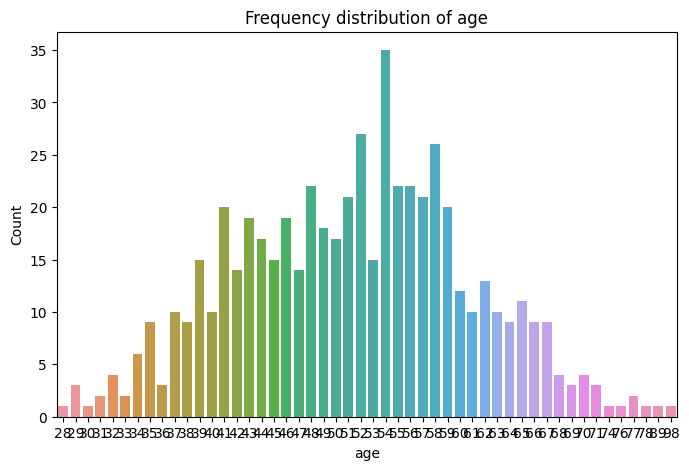

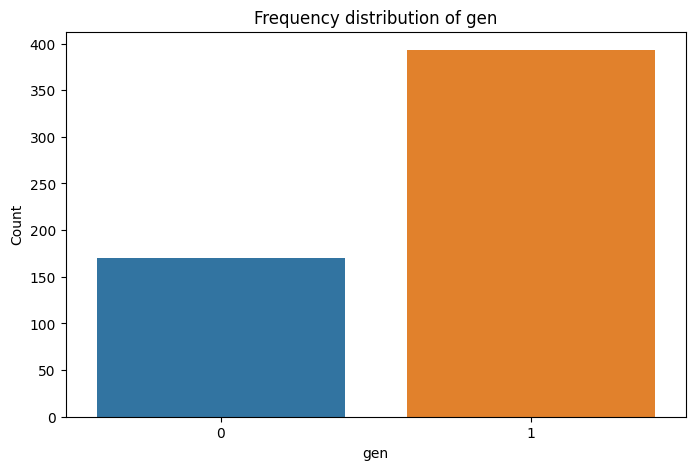

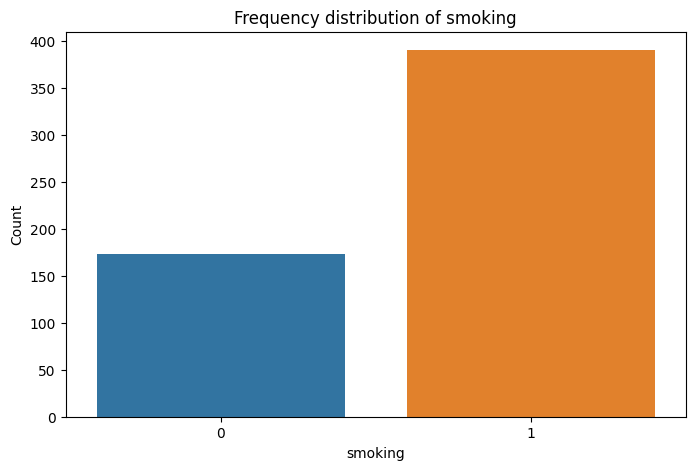

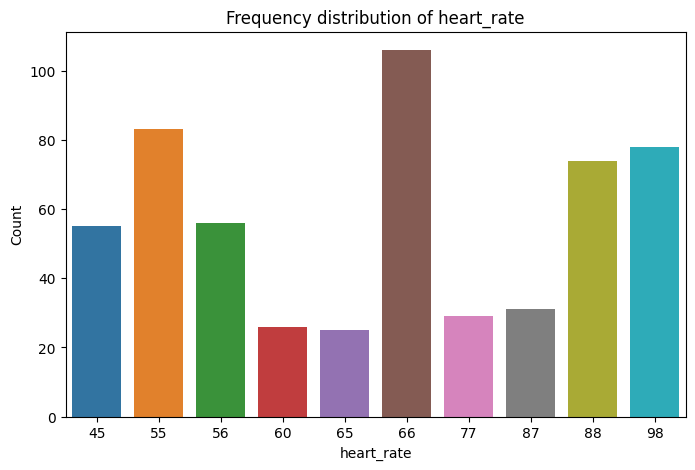

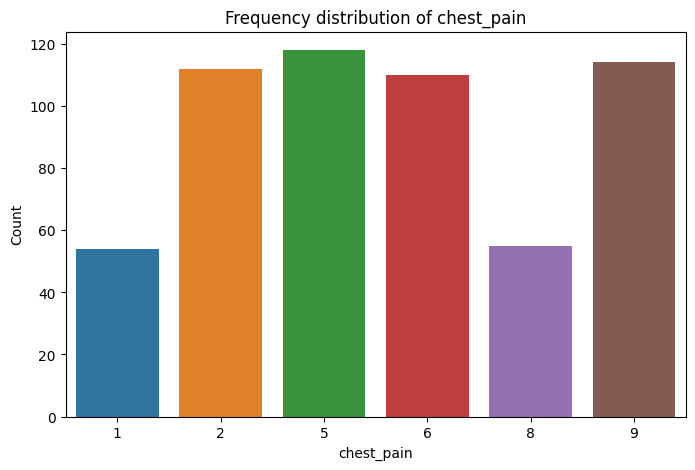

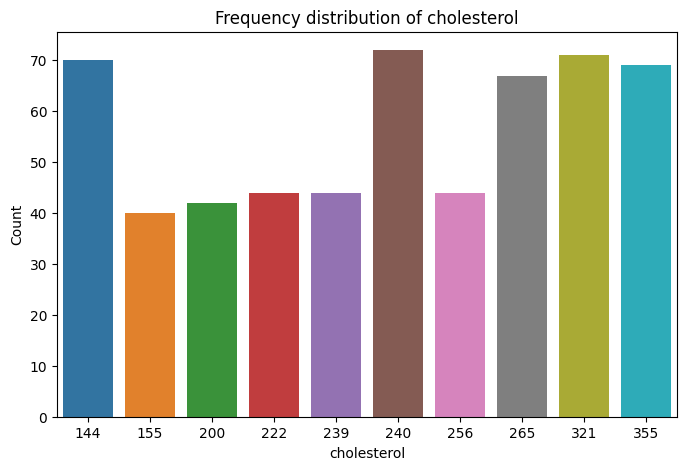

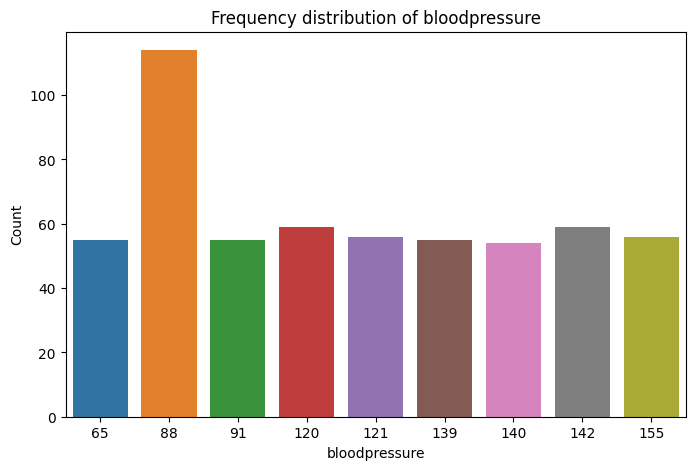

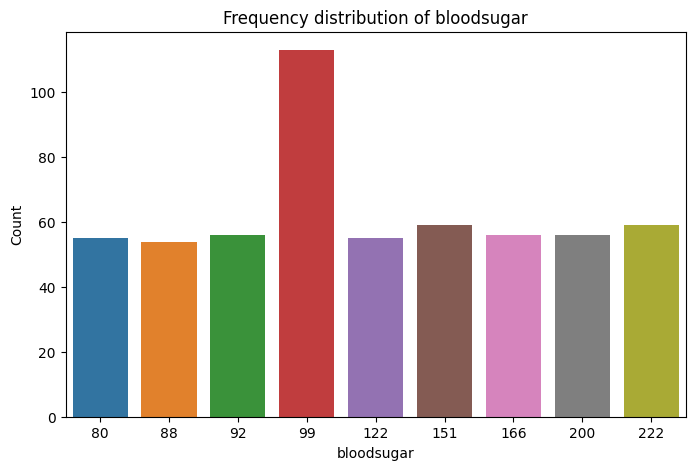


Summary statistics of age :
count    563.000000
mean      51.465364
std        9.686370
min       28.000000
25%       44.000000
50%       52.000000
75%       58.000000
max       98.000000
Name: age, dtype: float64

Summary statistics of gen :
count    563.000000
mean       0.698046
std        0.459514
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: gen, dtype: float64

Summary statistics of smoking :
count    563.000000
mean       0.692718
std        0.461778
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: smoking, dtype: float64

Summary statistics of heart_rate :
count    563.000000
mean      70.058615
std       17.106172
min       45.000000
25%       56.000000
50%       66.000000
75%       88.000000
max       98.000000
Name: heart_rate, dtype: float64

Summary statistics of chest_pain :
count    563.000000
mean       5.317940
std        2.748046
min        1.000000
25

In [69]:
#features
features = ['age','gen', 'smoking', 'heart_rate', 'chest_pain', 'cholesterol',
       'bloodpressure', 'bloodsugar']

# Frequency distribution of  features
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=stroke)
    plt.title('Frequency distribution of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

# Summary statistics of  features
for feature in features:
    print('\nSummary statistics of', feature, ':')
    print(stroke[feature].describe())

In [70]:
# Dispersion Analysis
for feature in features:
    print('\nRange of', feature, ':', stroke[feature].max() - stroke[feature].min())
    print('Variance of', feature, ':', stroke[feature].var())
    print('IQR of', feature, ':', stroke[feature].quantile(0.75) - stroke[feature].quantile(0.25))



Range of age : 70
Variance of age : 93.82575551664634
IQR of age : 14.0

Range of gen : 1
Variance of gen : 0.21115275942934078
IQR of gen : 1.0

Range of smoking : 1
Variance of smoking : 0.213238687003407
IQR of smoking : 1.0

Range of heart_rate : 53
Variance of heart_rate : 292.6211133796452
IQR of heart_rate : 32.0

Range of chest_pain : 8
Variance of chest_pain : 7.551759448303763
IQR of chest_pain : 6.0

Range of cholesterol : 211
Variance of cholesterol : 4317.13590766294
IQR of cholesterol : 65.0

Range of bloodpressure : 90
Variance of bloodpressure : 807.5047186210122
IQR of bloodpressure : 52.0

Range of bloodsugar : 142
Variance of bloodsugar : 2302.549117273377
IQR of bloodsugar : 74.0


<Axes: xlabel='age'>

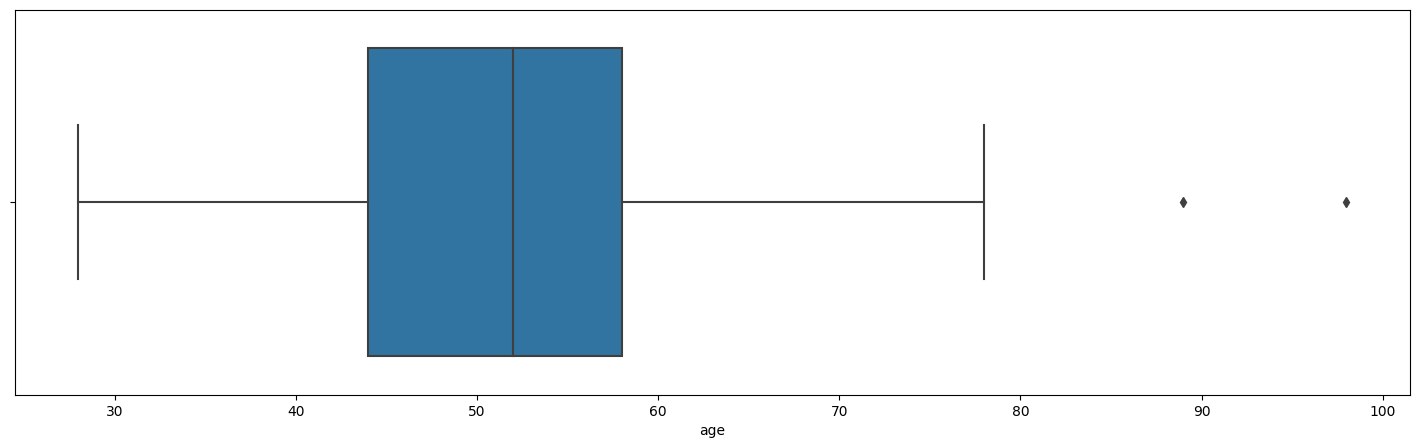

In [71]:
# Outlier Detection
plt.figure(figsize=(18,5))
sns.boxplot(x='age',data=stroke)

In [72]:
# Calculate the IQR for 'age'
Q1 = stroke['age'].quantile(0.25)
Q3 = stroke['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from 'age'
data = stroke[(stroke['age'] >= lower_bound) & (stroke['age'] <= upper_bound)]

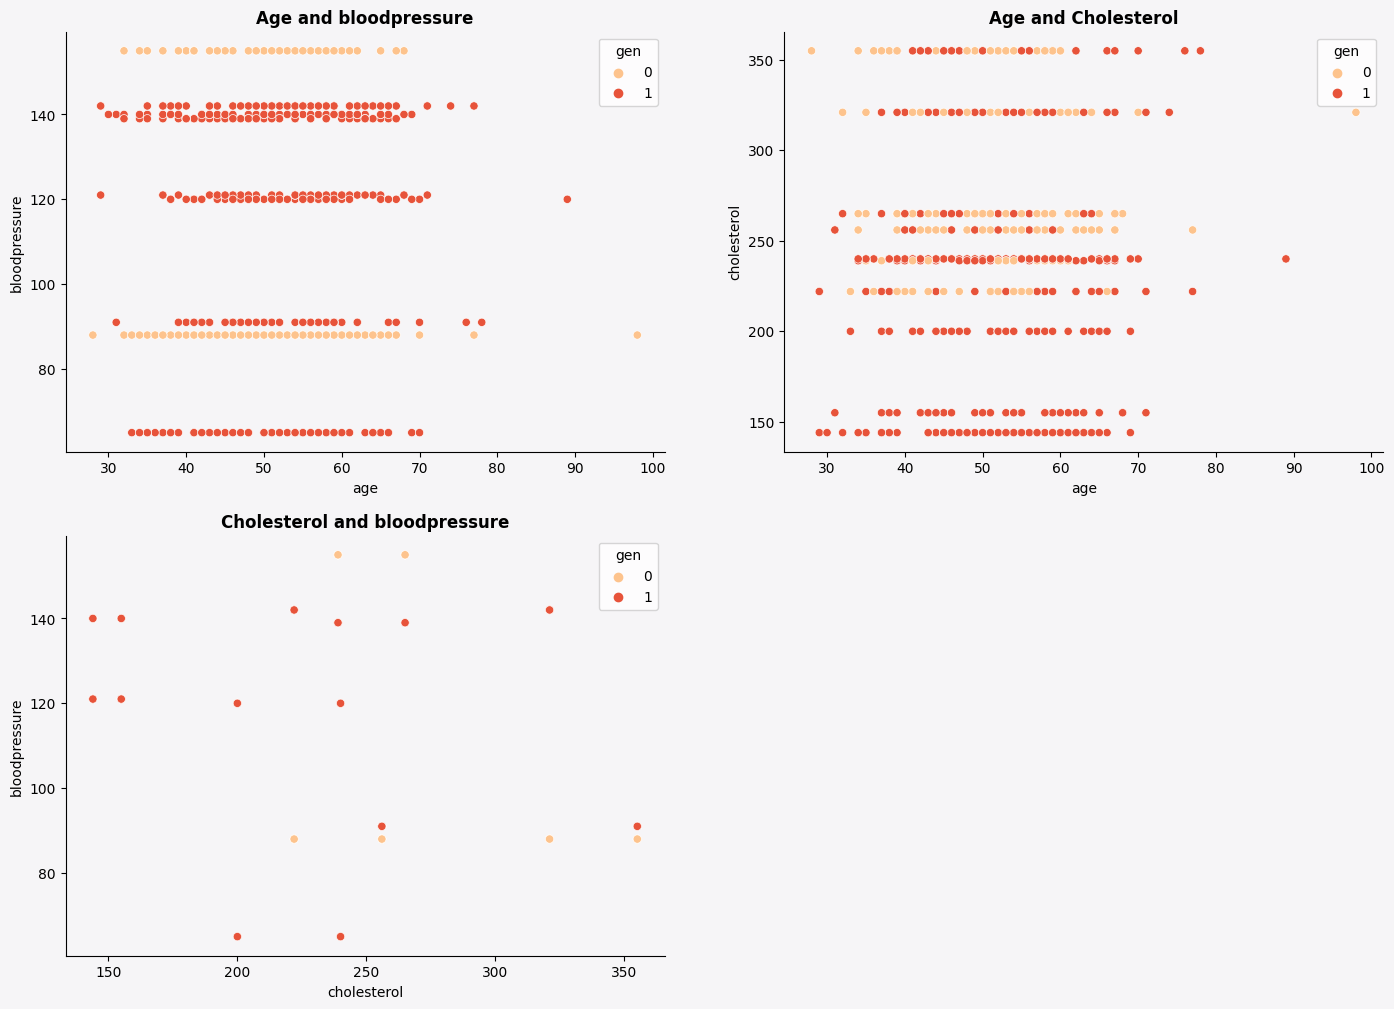

In [73]:
#YANG NI CANCEL JGN LETAK DLM REPORT
data_numerical=stroke[['age','cholesterol','bloodpressure']]
data_gen=stroke[['gen']]

fig = plt.figure(figsize=(17,12))
gs = fig.add_gridspec(2,2)
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
ax2=fig.add_subplot(gs[1,0])
axes=[ax0,ax1,ax2]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)
# Age&bmi
sns.scatterplot(ax=ax0,x=data_numerical['age'],y=data_numerical['bloodpressure'],hue=data_gen['gen'],palette="OrRd")
ax0.set_title('Age and bloodpressure',fontweight='bold')
# Age and Glucose
sns.scatterplot(ax=ax1,x=data_numerical['age'],y=data_numerical['cholesterol'],hue=data_gen['gen'],palette="OrRd")
ax1.set_title('Age and Cholesterol',fontweight='bold')
# BMI and Glucose
sns.scatterplot(ax=ax2,x=data_numerical['cholesterol'],y=data_numerical['bloodpressure'],hue=data_gen['gen'],palette="OrRd")
ax2.set_title('Cholesterol and bloodpressure',fontweight='bold')
#removing spines
for i in ["top","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)

In [74]:
#ATAS NI REJECT, DONNO HOW TO EXPLAIN

In [75]:
# feature selection using varianceThreshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=5)
selected_features = selector.fit_transform(stroke)


In [76]:
data = pd.DataFrame(selected_features, columns=selector.get_feature_names_out())
print(data)

# Print selected high-variance features to output file
data.to_csv("varthreshold_data.csv",index=False)


     age  heart_rate  chest_pain  cholesterol  bloodpressure  bloodsugar
0     33          45           6          200             65          80
1     55          66           9          256             88          99
2     77          87           5          222            142         151
3     55          55           2          155            121         200
4     66          56           8          239            139         122
..   ...         ...         ...          ...            ...         ...
558   49          98           8          239            139         122
559   51          98           5          240            120         222
560   42          66           9          321             88          92
561   51          87           1          144            140          88
562   59          55           2          265            155         166

[563 rows x 6 columns]


In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# conduct correlation
cor = data.corr()
cor

,age,heart_rate,chest_pain,cholesterol,bloodpressure,bloodsugar
age,1.000000,0.000189,-0.002961,0.013524,-0.006933,0.043261
heart_rate,0.000189,1.000000,-0.000738,0.053110,0.032025,0.044849
chest_pain,-0.002961,-0.000738,1.000000,0.630765,-0.582080,-0.414211
cholesterol,0.013524,0.053110,0.630765,1.000000,-0.285335,-0.263286
bloodpressure,-0.006933,0.032025,-0.582080,-0.285335,1.000000,0.498421
bloodsugar,0.043261,0.044849,-0.414211,-0.263286,0.498421,1.000000


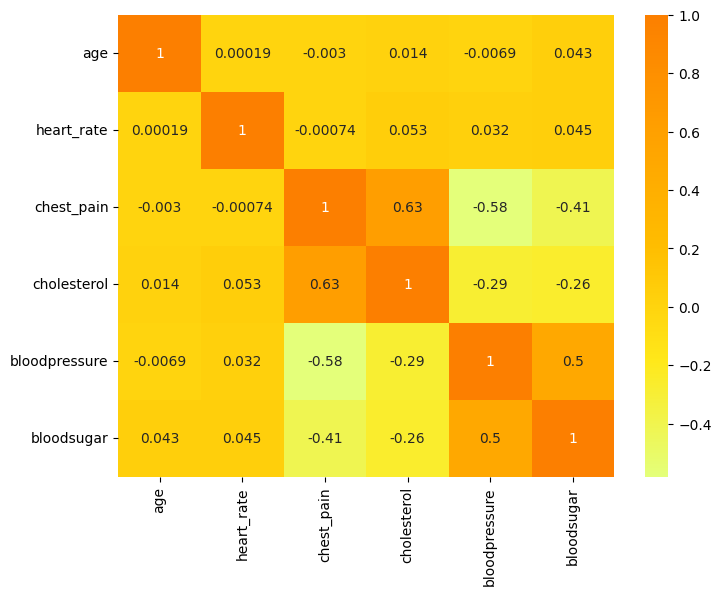

In [78]:
# plot heatmap via correlation
plt.figure(figsize=(8,6))
sns.heatmap(cor, annot=True, cmap='Wistia')
plt.show()

K-MEANS

In [79]:
scaler = StandardScaler()

In [80]:
df_scaled = scaler.fit_transform(stroke)

In [81]:
df_scaled[0]

array([-1.90801981,  0.65770052,  0.66602533, -1.46619005,  0.24841899,
       -0.70210232, -1.76022209, -1.09901319])

In [82]:
k_means_model = KMeans(n_clusters=2) #n_clusters is K value.

In [83]:
k_means_model.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [86]:
cluster_labels = k_means_model.predict(df_scaled) #we can also do that with fit_predict() method.

In [87]:
cluster_labels

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,

In [35]:
stroke["Label_stroke"] = cluster_labels

In [36]:
stroke.head()

,age,gen,smoking,heart_rate,chest_pain,cholesterol,bloodpressure,bloodsugar,Label_stroke
0,33,1,1,45,6,200,65,80,1
1,55,0,0,66,9,256,88,99,1
2,77,1,1,87,5,222,142,151,0
3,55,1,1,55,2,155,121,200,0
4,66,1,1,56,8,239,139,122,0


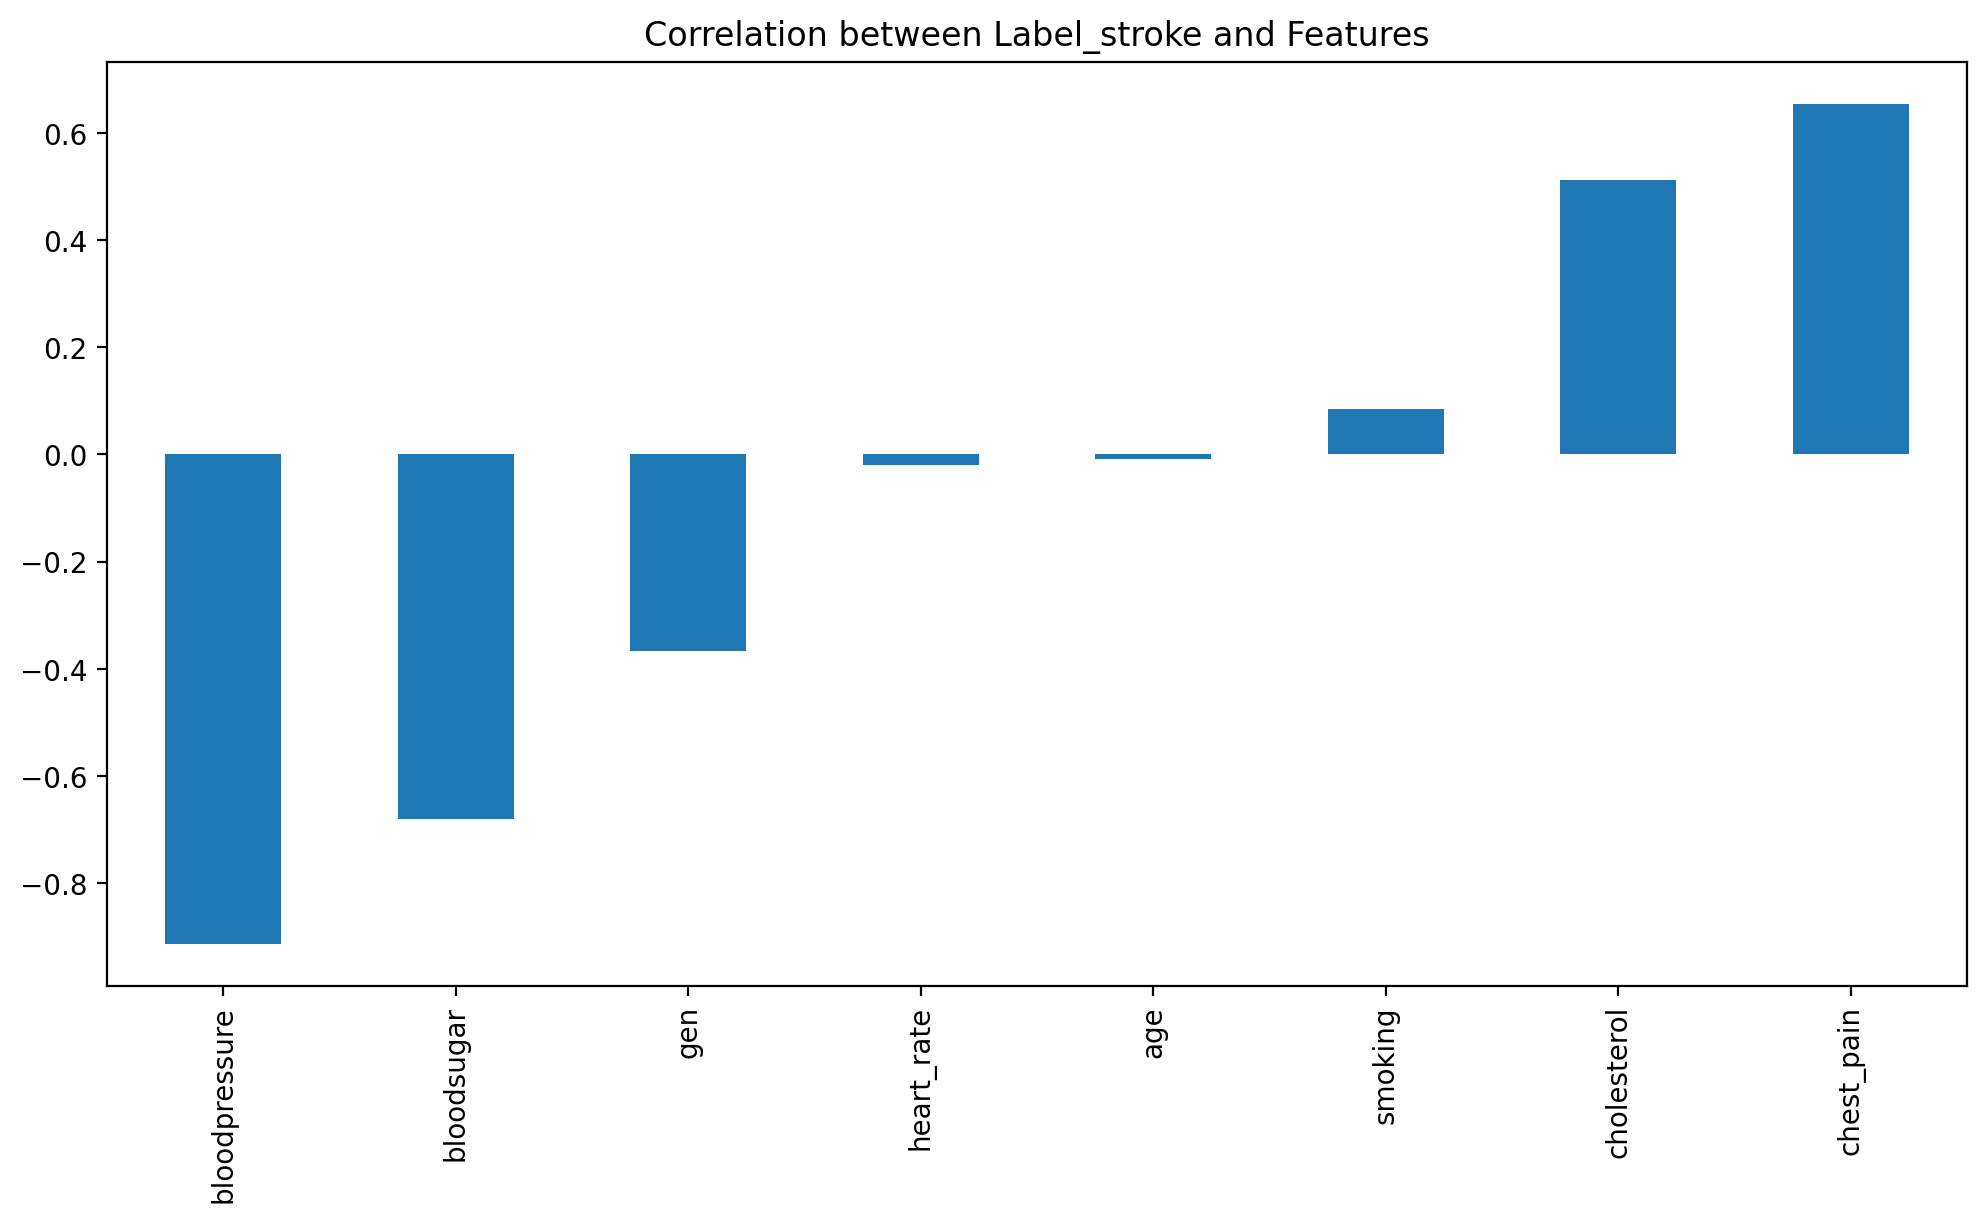

In [37]:
plt.figure(figsize=(12,6),dpi=200)
stroke.corr()["Label_stroke"].iloc[:-1].sort_values().plot(kind="bar")
plt.title("Correlation between Label_stroke and Features")
plt.show()

In [55]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette score
silhouette_avg = silhouette_score(stroke, cluster_labels)
print("The Silhouette score is:", silhouette_avg)

The Silhouette score is: 0.09263558249051611


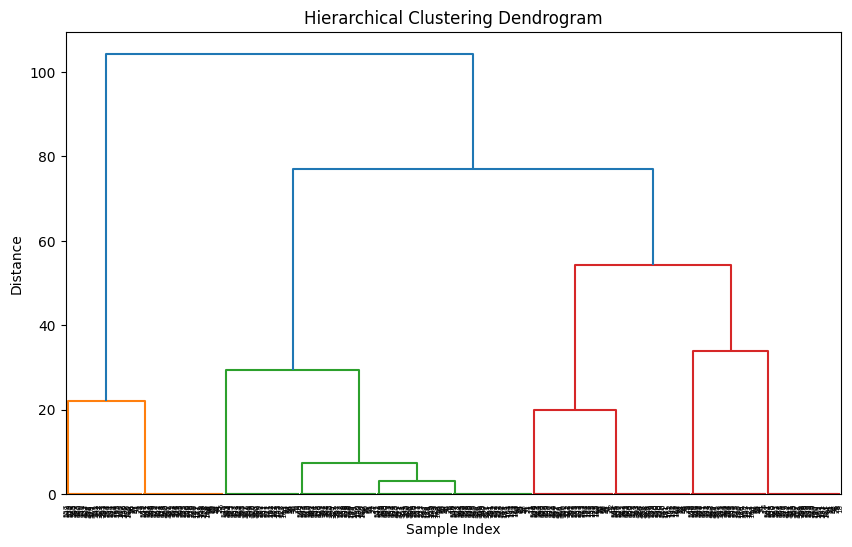

In [38]:
from scipy.cluster import hierarchy

# Select the features for clustering
features = stroke[['gen', 'bloodpressure', 'bloodsugar']]

# Perform hierarchical clustering
linkage = hierarchy.linkage(features, method='average')
# You can choose different linkage methods like 'single', 'complete', 'average', etc.

# Plot the dendrogram
plt.figure(figsize=(10, 6))
hierarchy.dendrogram(linkage)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()

In [40]:
df_scaled = scaler.fit_transform(stroke)

In [41]:
df_scaled[:5]

array([[0.07142857, 1.        , 1.        , 0.        , 0.625     ,
        0.26540284, 0.        , 0.        , 1.        ],
       [0.38571429, 0.        , 0.        , 0.39622642, 1.        ,
        0.53080569, 0.25555556, 0.13380282, 1.        ],
       [0.7       , 1.        , 1.        , 0.79245283, 0.5       ,
        0.36966825, 0.85555556, 0.5       , 0.        ],
       [0.38571429, 1.        , 1.        , 0.18867925, 0.125     ,
        0.0521327 , 0.62222222, 0.84507042, 0.        ],
       [0.54285714, 1.        , 1.        , 0.20754717, 0.875     ,
        0.45023697, 0.82222222, 0.29577465, 0.        ]])

In [42]:
df_scaled  = pd.DataFrame(df_scaled,columns=stroke.columns)

In [43]:
df_scaled.head()

,age,gen,smoking,heart_rate,chest_pain,cholesterol,bloodpressure,bloodsugar,Label_stroke
0,0.071429,1.0,1.0,0.000000,0.625,0.265403,0.000000,0.000000,1.0
1,0.385714,0.0,0.0,0.396226,1.000,0.530806,0.255556,0.133803,1.0
2,0.700000,1.0,1.0,0.792453,0.500,0.369668,0.855556,0.500000,0.0
3,0.385714,1.0,1.0,0.188679,0.125,0.052133,0.622222,0.845070,0.0
4,0.542857,1.0,1.0,0.207547,0.875,0.450237,0.822222,0.295775,0.0


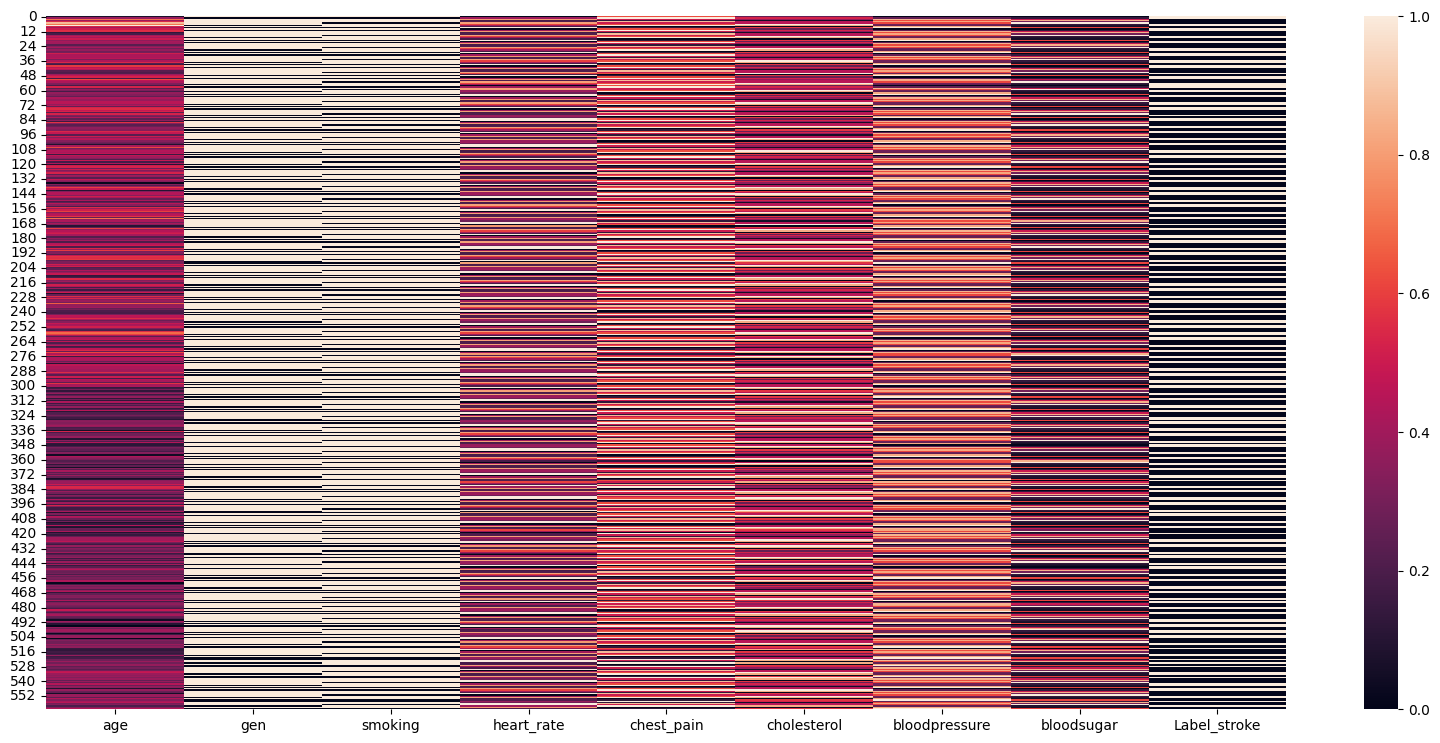

In [44]:
plt.figure(figsize=(20,9))
sns.heatmap(df_scaled)
plt.show()

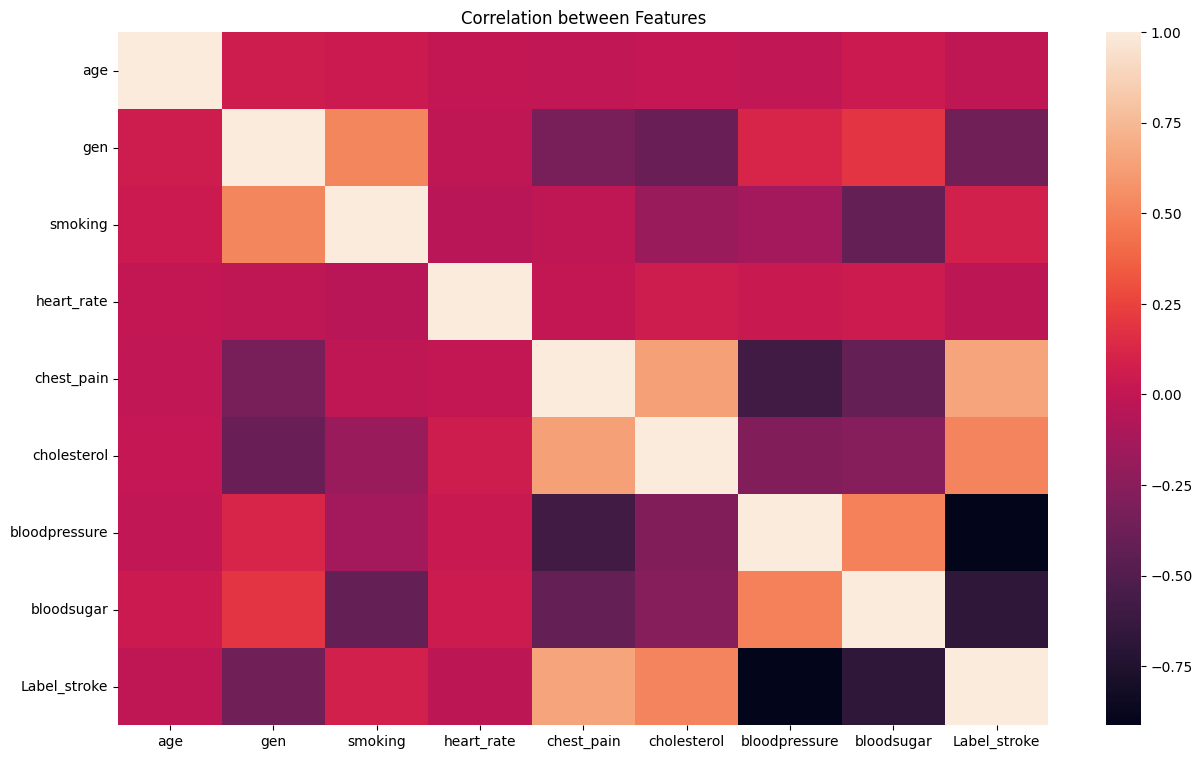

In [45]:
plt.figure(figsize=(15,9))
sns.heatmap(df_scaled.corr())
plt.title("Correlation between Features")
plt.show()

In [46]:
from sklearn.cluster import AgglomerativeClustering
hier_model = AgglomerativeClustering(n_clusters=5,affinity="euclidean")

In [47]:
cluster_labels = hier_model.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [48]:
cluster_labels[:20]

array([3, 1, 0, 0, 0, 2, 3, 1, 0, 4, 3, 1, 0, 0, 0, 2, 3, 1, 0, 4])

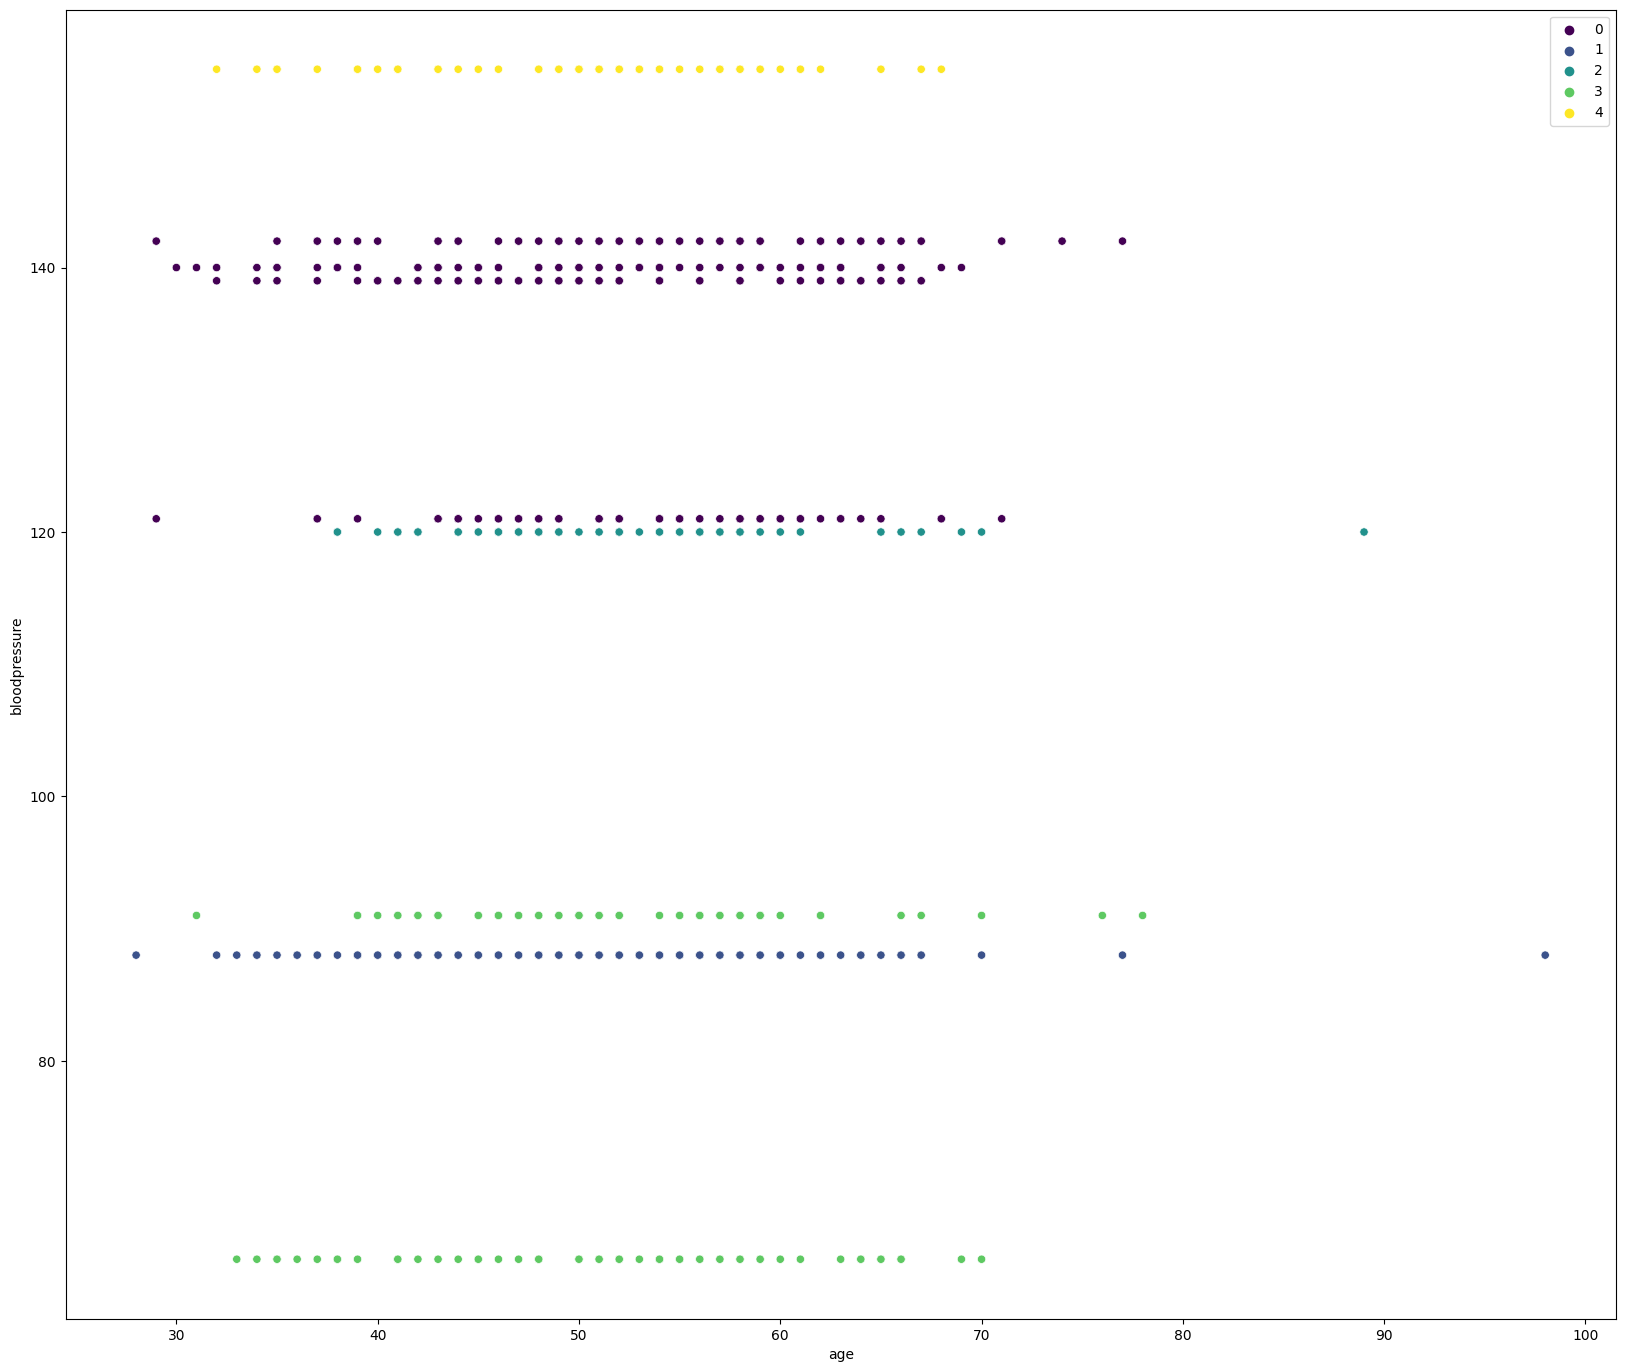

In [49]:
plt.figure(figsize=(20,17))
sns.scatterplot(data=stroke,x="age",y="bloodpressure",hue=cluster_labels,palette="viridis")
plt.grid(False)

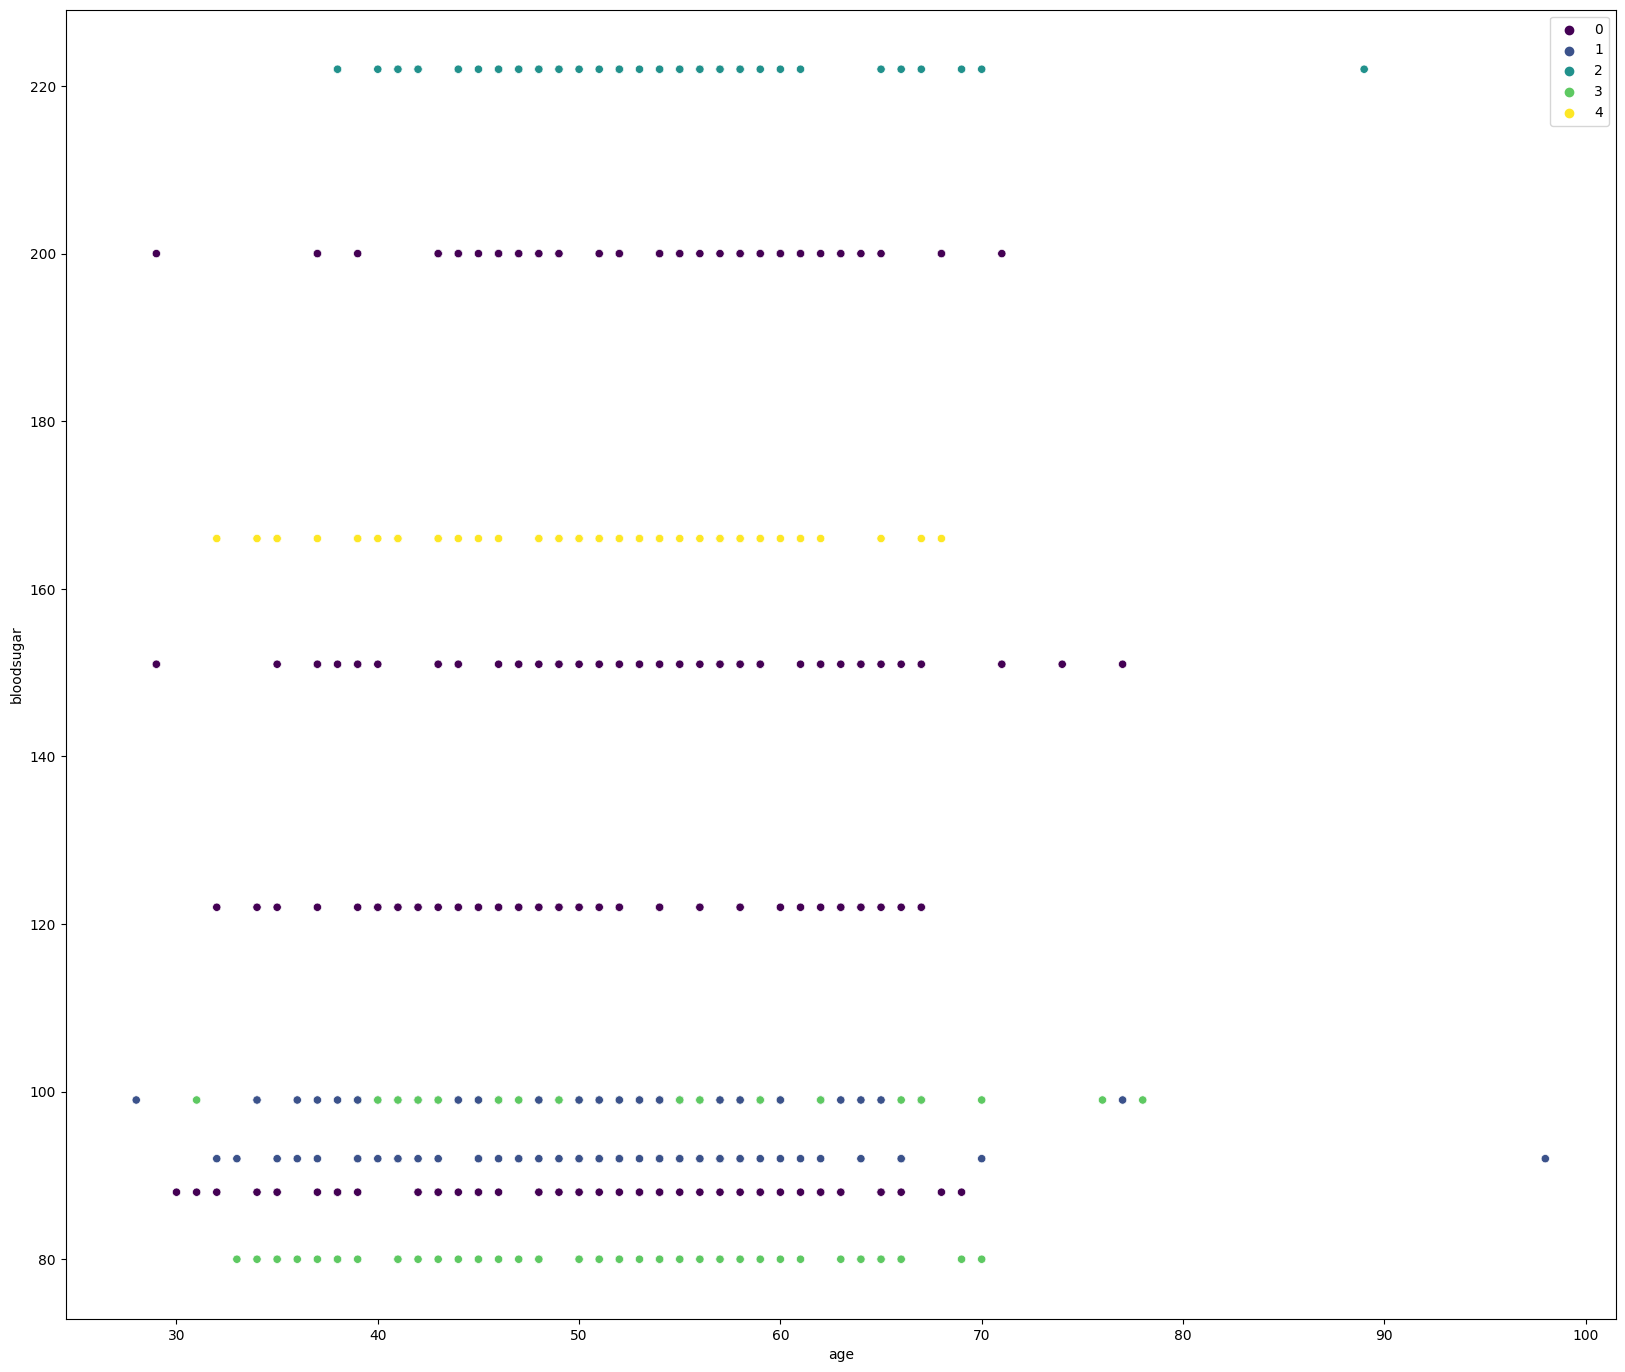

In [50]:
plt.figure(figsize=(20,17))
sns.scatterplot(data=stroke,x="age",y="bloodsugar",hue=cluster_labels,palette="viridis")
plt.grid(False)

In [51]:
linkage_matrix = hierarchy.linkage(hier_model.children_)

In [52]:
linkage_matrix

array([[1.00000000e+00, 1.57000000e+02, 1.41421356e+00, 2.00000000e+00],
       [4.70000000e+01, 3.33000000e+02, 1.41421356e+00, 2.00000000e+00],
       [1.00000000e+01, 2.86000000e+02, 1.41421356e+00, 2.00000000e+00],
       ...,
       [1.10100000e+03, 1.11900000e+03, 9.34719209e+01, 5.59000000e+02],
       [5.05000000e+02, 1.12000000e+03, 1.11731822e+02, 5.60000000e+02],
       [8.48000000e+02, 1.12100000e+03, 1.36824705e+02, 5.62000000e+02]])

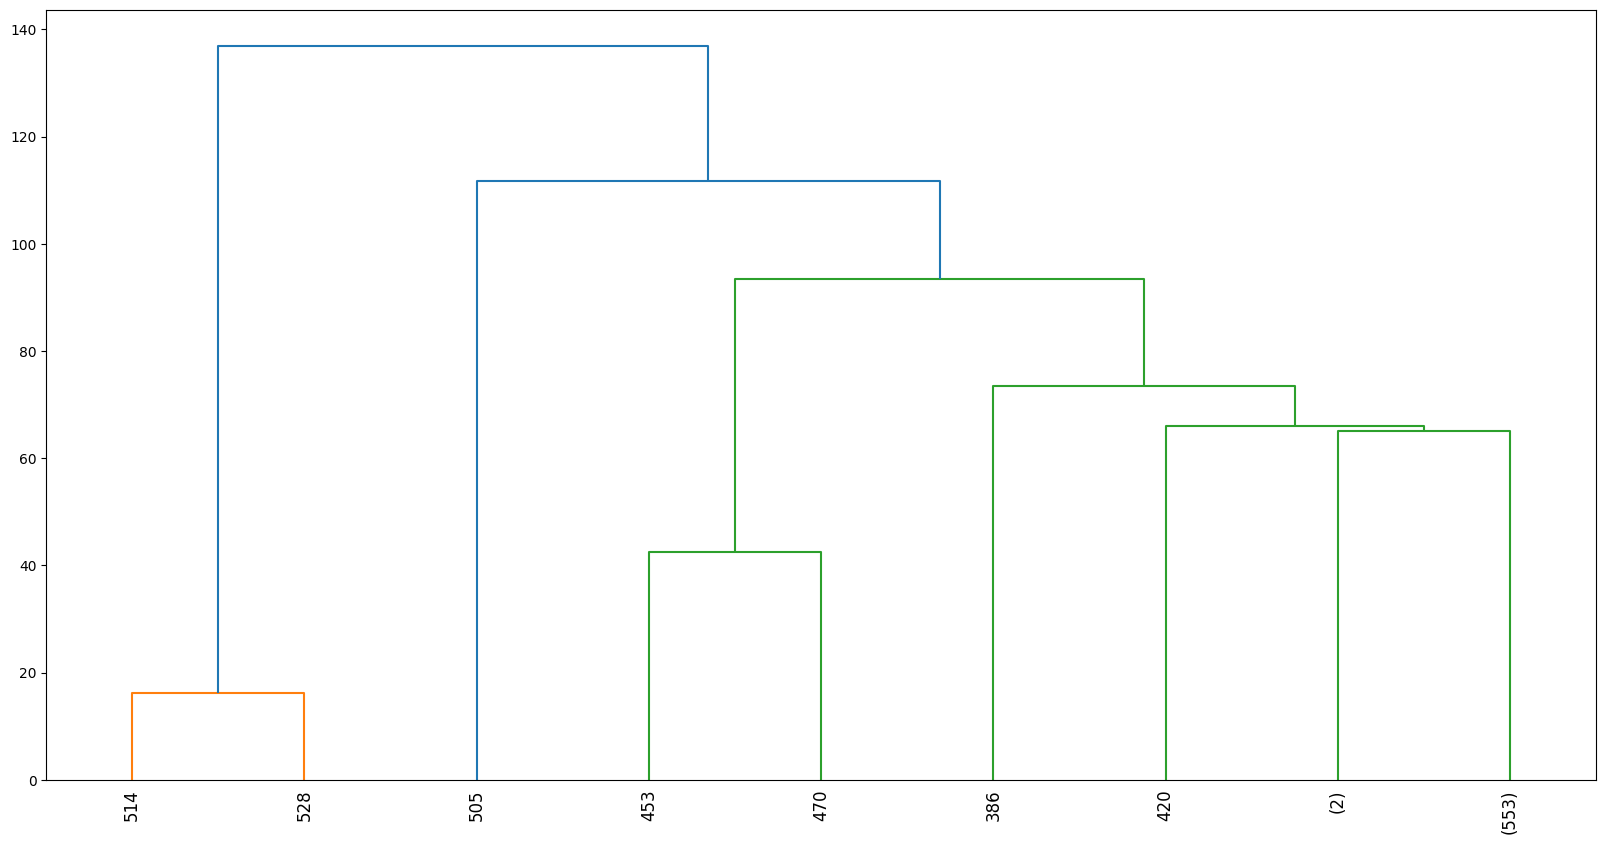

In [53]:
plt.figure(figsize=(20,10))
dendrogram = hierarchy.dendrogram(linkage_matrix,truncate_mode="level",p=5)
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

In [54]:
from sklearn.metrics import silhouette_score

# Perform hierarchical clustering
clusterer = AgglomerativeClustering(n_clusters=5)  # Specify the number of clusters
labels = clusterer.fit_predict(stroke)

# Calculate the Silhouette score
silhouette_avg = silhouette_score(stroke, labels)
print("The Silhouette score is:", silhouette_avg)


The Silhouette score is: 0.5210275236981265
